<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/DART_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos Mareográficos obtenidos desde Boyas DART

In [ ]:
def DART_extract(code,timestart,days):
  #Function to extract tide gauge data in a station from DART Buoys (https://www.ndbc.noaa.gov/dart.shtml)
  #in automatic way (Web Scrapping).
  #arguments:
  #code      : station code (extracted from DART webpage), example: 32412
  #timestart : initial time (date, UTC) of the record, examples: '2010-02-27','27/02/2010','2010-02-27 06:30','27/02/2010 06:30'  
  #days      : number of days from timestart
  #timestop  : final time (date, UTC) of the record, example: '2010-03-02' (no implemented yet)
  #DART site will only allow download data in scale of days.
  #Created by Marco Quiroz (mqquiroz@uc.cl), Phd Student, Pontificia Universidad Católica de Chile.
  import numpy as np
  import datetime
  import requests
  def try_parsing_date(text):
    for fmt in ('%Y-%m-%d','%Y-%m-%d %H:%M','%Y-%m-%d %H:%M:%S','%d/%m/%Y','%d/%m/%Y %H:%M','%d/%m/%Y %H:%M:%S'):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')
  timestart = try_parsing_date(timestart)
  timestop = timestart + datetime.timedelta(days=days)
  inputs = {'station':code,'startmonth':timestart.month,'startday':timestart.day,'startyear':timestart.year,'endmonth':timestop.month,'endday':timestop.day,'endyear':timestop.year}
  response = requests.get('https://www.ndbc.noaa.gov/dart_data.php?', params=inputs, timeout=20)
  aux_file = open('aux.txt','w')
  aux_file.write(response.text)
  aux_file.close()
  raw_data = np.loadtxt('aux.txt',skiprows=10)
  raw_data = np.flip(raw_data,axis=0)
  eta = raw_data[:,7]
  date = raw_data[:,:6]
  date = date.astype(int)
  ind_outlayer = np.where(eta == 9999.000)
  eta[ind_outlayer] = np.nan
  #convert date to Python julian number
  time = [datetime.datetime(date[i,0],date[i,1],date[i,2],date[i,3],date[i,4],date[i,5]) for i in range(len(date))]
  return time, eta

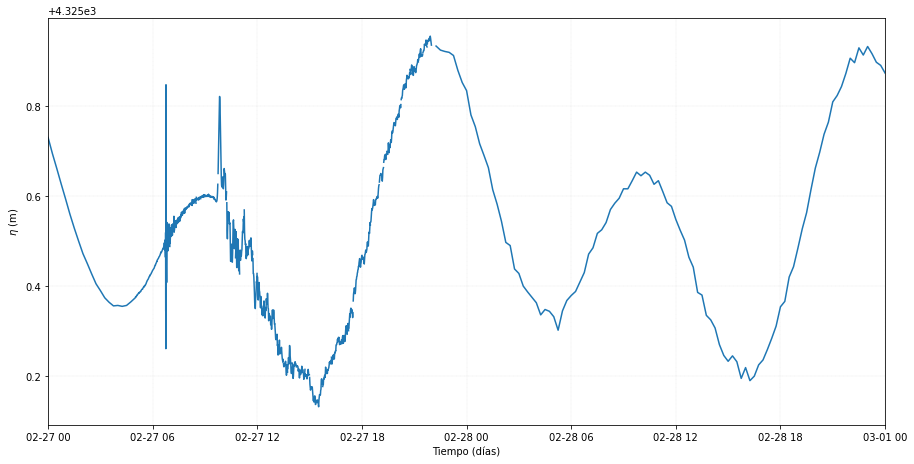

In [ ]:
#Cargamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import datetime

time, eta = DART_extract(32412,'27/02/2010',2)

alto  = 7.5
ancho = 15
fig = plt.figure(figsize=(ancho, alto))


plt.plot(time,eta)
plt.xlim(time[0],time[-1])
plt.xlabel('Tiempo (días)')
plt.ylabel('$\eta$ (m)')
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.show()